In [ ]:
pip install tenseal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 37.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import tenseal as ts

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import tenseal as ts# Load dataset
df = pd.read_csv('/content/Advanced_IoT_Dataset.csv')

In [ ]:
# Drop irrelevant columns and encode target column
df.drop(columns=['Random'], inplace=True)
label_encoder = LabelEncoder()
df['Class'] = label_encoder.fit_transform(df['Class'])

In [ ]:
# Separate features and target variable
X = df.drop(columns=['Class'])
y = df['Class']

In [ ]:
import tenseal as ts
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = df.drop(columns=['Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

model = Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train_categorical.shape[1], activation='softmax')  # Use softmax for multi-class classification
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)


context = ts.context(
    ts.SCHEME_TYPE.CKKS,
    poly_modulus_degree=8192,
    coeff_mod_bit_sizes=[60, 40, 40, 60]
)
context.global_scale = 2**40
context.generate_galois_keys()

encrypted_X_test = [ts.ckks_vector(context, sample) for sample in X_test]


encrypted_predictions = []


for enc_sample in encrypted_X_test:

    decrypted_sample = np.array(enc_sample.decrypt()).reshape(1, -1)

    prediction = model.predict(decrypted_sample)
    encrypted_predictions.append(np.argmax(prediction))

encrypted_accuracy = accuracy_score(y_test, encrypted_predictions)
print("Encrypted (simulated) Accuracy:", encrypted_accuracy)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 23ms/step
Encrypted (simulated) Accuracy: 0.9501666666666667


In [ ]:

sample_input = np.array([34.5, 55.0, 1.3, 1280.0, 5.0, 16.0, 1.6, 18.0, 19.0, 3.0, 0.1, 57.0])
sample_input = scaler.transform([sample_input])[0]

encrypted_sample = ts.ckks_vector(context, sample_input)

decrypted_sample = np.array(encrypted_sample.decrypt()).reshape(1, -1)
prediction = model.predict(decrypted_sample)

predicted_class_index = np.argmax(prediction)

predicted_class = label_encoder.inverse_transform([predicted_class_index])[0]

print("Sample input prediction (decrypted):", predicted_class)

1/1 [==============================] - 0s 24ms/step
Sample input prediction (decrypted): SA


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


188/188 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       982
           1       0.94      0.96      0.95      1009
           2       0.95      0.95      0.95      1041
           3       0.94      0.95      0.94       947
           4       0.97      0.95      0.96      1049
           5       0.95      0.95      0.95       972

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000



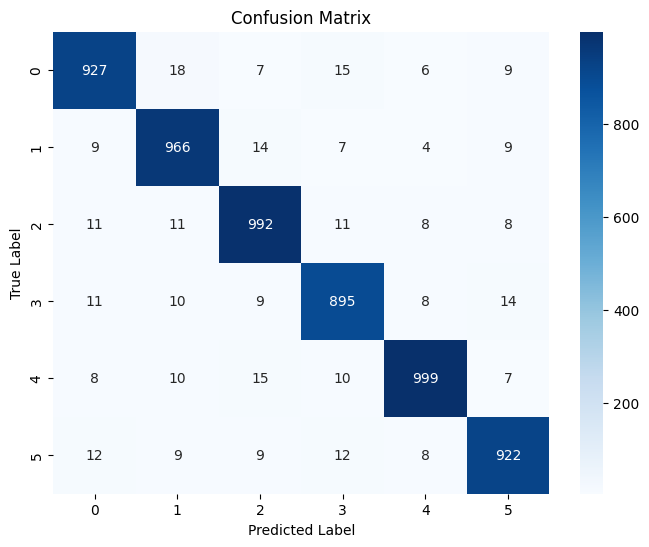

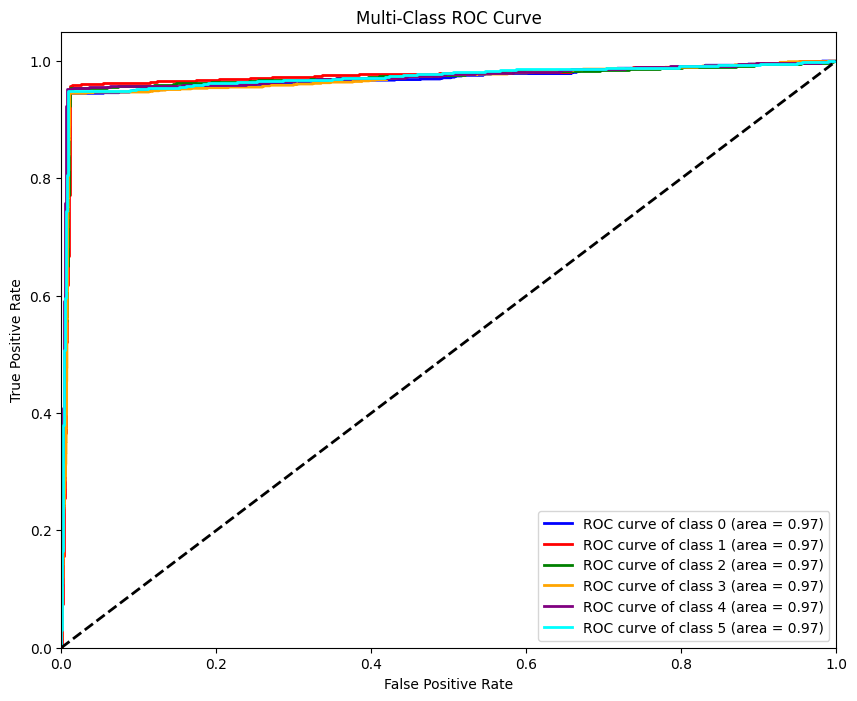